# Data Preprocessing & EDA

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
ch = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Churn_Prediction/main/resources/Churn.csv')

ch

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [3]:
ch.drop(columns='Unnamed: 0', inplace = True)

ch

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
ch_nrow = ch.shape[0]

In [5]:
def lost_record():

    ch_nrow_now = ch.shape[0]
    lost = ch_nrow - ch_nrow_now
    lost = (lost/ch_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [6]:
ch.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


#### Performing Typecasting

In [7]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

#### Performing Missing Value Imputation

In [8]:
def missing_percentage(ch):

    m = ch.isna().sum()
    total = int(ch.shape[0])

    for i in range(len(ch.columns)):
        percentage =round((m[i]/total)*100)

        print(str(ch.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [9]:
missing_percentage(ch)

state has 0 % missing value(0)
area.code has 0 % missing value(0)
account.length has 0 % missing value(0)
voice.plan has 0 % missing value(0)
voice.messages has 0 % missing value(0)
intl.plan has 0 % missing value(0)
intl.mins has 0 % missing value(0)
intl.calls has 0 % missing value(0)
intl.charge has 0 % missing value(0)
day.mins has 0 % missing value(0)
day.calls has 0 % missing value(0)
day.charge has 0 % missing value(0)
eve.mins has 0 % missing value(0)
eve.calls has 0 % missing value(0)
eve.charge has 0 % missing value(0)
night.mins has 0 % missing value(0)
night.calls has 0 % missing value(0)
night.charge has 0 % missing value(0)
customer.calls has 0 % missing value(0)
churn has 0 % missing value(0)


#### Finding Unique Values In Dataset

In [10]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [11]:
uni(ch)


 All Unique Value in state
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Total no of unique values 51

 All Unique Value in area.code
['area_code_408' 'area_code_415' 'area_code_510']
Total no of unique values 3

 All Unique Value in account.length
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 

### Performing Data Cleaning

#### day.charge

In [12]:
ch[ch['day.charge'] == 'Nan'].shape

(7, 20)

In [13]:
dc = ch[ch['day.charge'] == 'Nan'].index

len(dc)

7

In [14]:
drop = []

for i in dc:
    drop.append(i)

drop

[12, 27, 47, 4407, 4755, 4965, 4992]

#### eve.mins

In [15]:
ch[ch['eve.mins'] == 'Nan'].shape

(24, 20)

In [16]:
em = ch[ch['eve.mins'] == 'Nan'].index

len(em)

24

In [17]:
for i in em:
    drop.append(i)

#### Droping All Nan Data

In [18]:
sorted(drop)

[12,
 27,
 47,
 89,
 102,
 110,
 159,
 231,
 254,
 299,
 345,
 460,
 557,
 624,
 684,
 729,
 750,
 795,
 892,
 1012,
 1099,
 1219,
 1417,
 1483,
 1625,
 1699,
 1778,
 4407,
 4755,
 4965,
 4992]

In [19]:
ch.drop(drop, inplace = True)

ch

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [20]:
lost_record()

We lost 0.62 % data


#### Typecasting Column's

In [21]:
ch['day.charge'] = ch['day.charge'].apply(lambda x: float(x))
ch['eve.mins'] = ch['eve.mins'].apply(lambda x: float(x))

ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4969 non-null   object 
 1   area.code       4969 non-null   object 
 2   account.length  4969 non-null   int64  
 3   voice.plan      4969 non-null   object 
 4   voice.messages  4969 non-null   int64  
 5   intl.plan       4969 non-null   object 
 6   intl.mins       4969 non-null   float64
 7   intl.calls      4969 non-null   int64  
 8   intl.charge     4969 non-null   float64
 9   day.mins        4969 non-null   float64
 10  day.calls       4969 non-null   int64  
 11  day.charge      4969 non-null   float64
 12  eve.mins        4969 non-null   float64
 13  eve.calls       4969 non-null   int64  
 14  eve.charge      4969 non-null   float64
 15  night.mins      4969 non-null   float64
 16  night.calls     4969 non-null   int64  
 17  night.charge    4969 non-null   f

In [22]:
uni(ch)


 All Unique Value in state
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Total no of unique values 51

 All Unique Value in area.code
['area_code_408' 'area_code_415' 'area_code_510']
Total no of unique values 3

 All Unique Value in account.length
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 

### Checking for Duplicated Values

In [23]:
ch[ch.duplicated()]

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Distribution of the churn columns

<AxesSubplot:title={'center':'Distribution of the ch columns'}, ylabel='churn'>

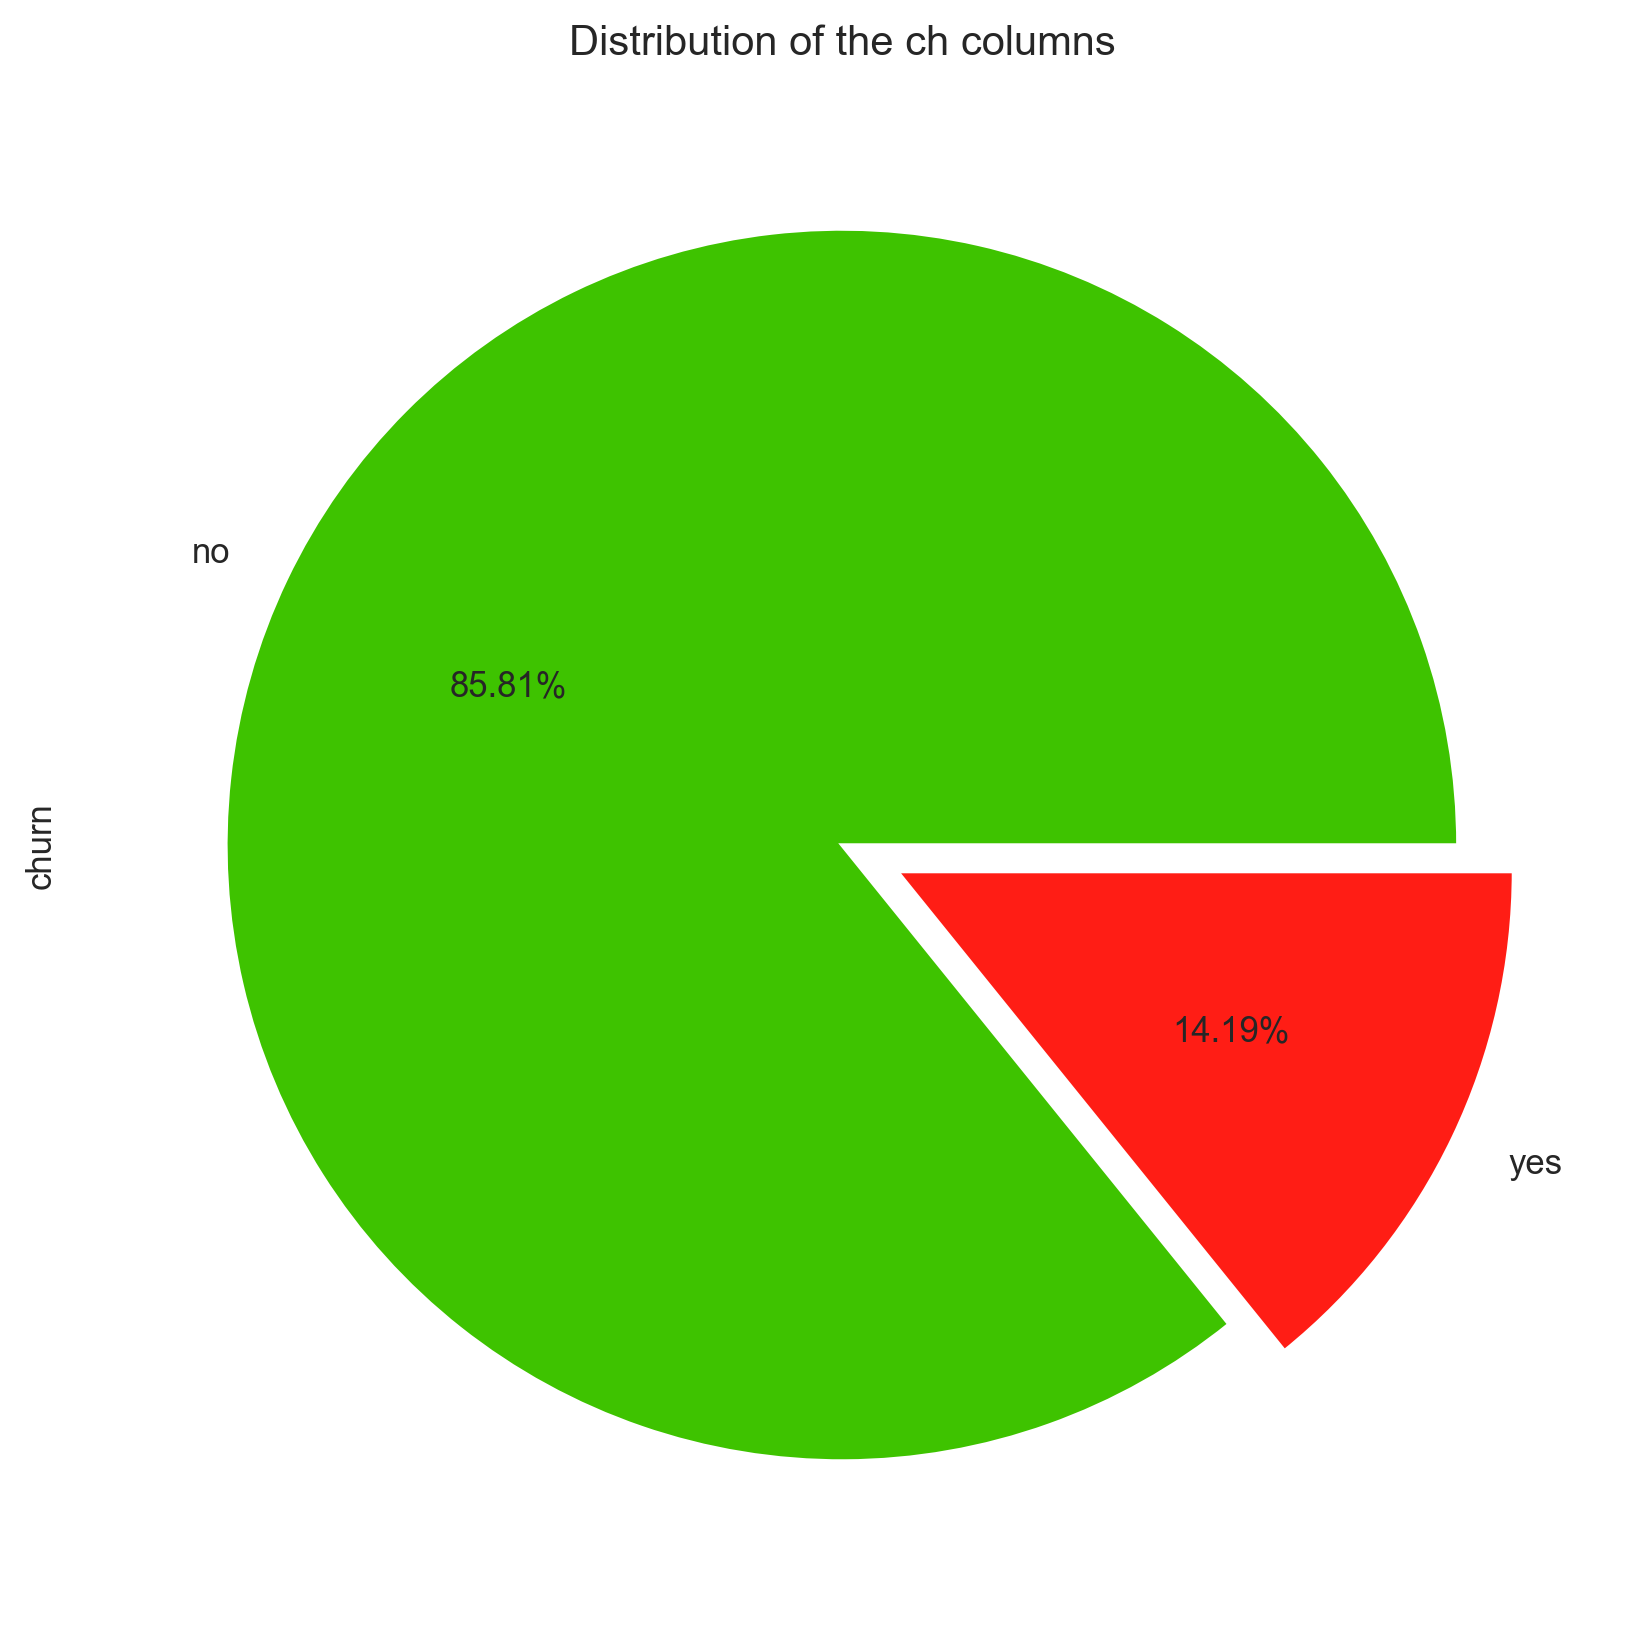

In [24]:
plt.title('Distribution of the ch columns')
explode = (0, 0.1)
ch['churn'].value_counts().plot(kind='pie', autopct = '%.2f%%',
            explode = explode, colors=['#3ec300', '#ff1d15'])

#### PLoting State And Area.Code

<AxesSubplot:title={'center':'Top 5 state'}, ylabel='state'>

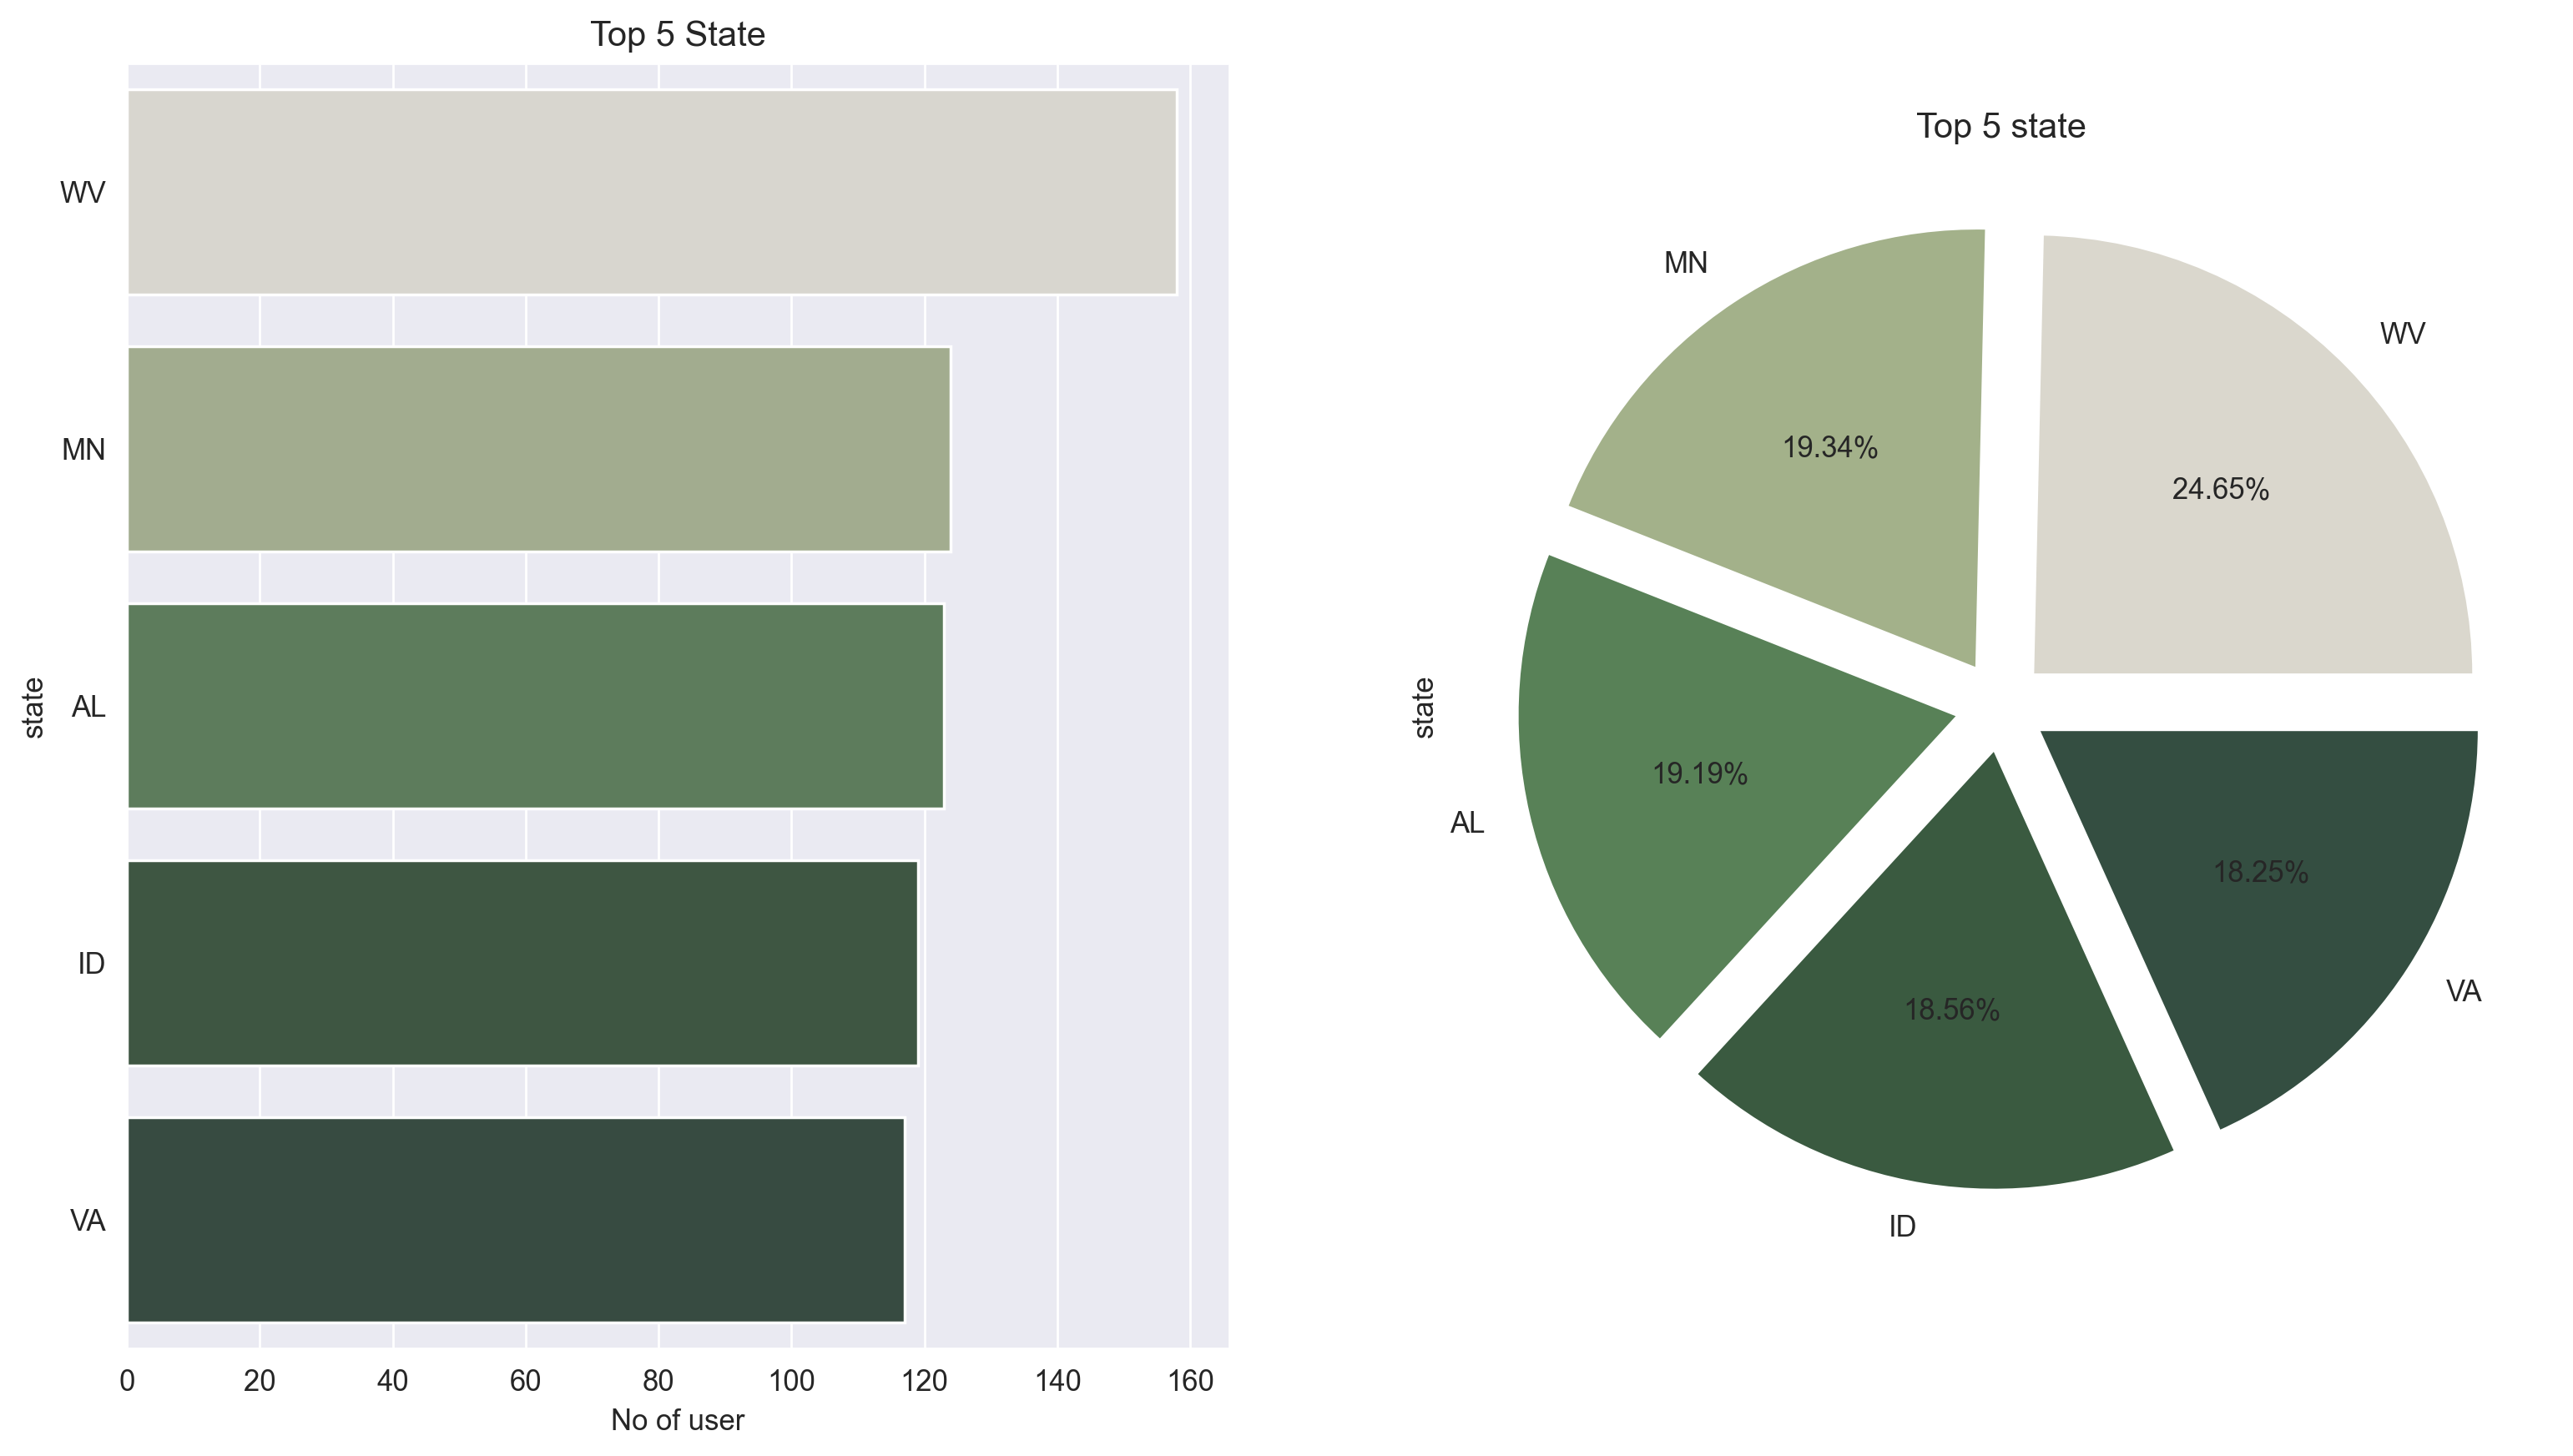

In [25]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], title = 'Top 5 State')
plt.setp(ax[0], xlabel = 'No of user')
plt.setp(ax[0], ylabel = 'state')
sns.barplot(y = ch['state'].value_counts().head(5).index, 
            x = ch['state'].value_counts().head(5).values, 
            ax = ax[0],
            palette=['#dad7cd','#a3b18a','#588157','#3a5a40','#344e41'])

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.setp(ax[1], title = "Top 5 state")
ch['state'].value_counts().head(5).plot(kind='pie', autopct = '%.2f%%', ax = ax[1],
            explode = explode, colors=['#dad7cd','#a3b18a','#588157','#3a5a40','#344e41'])

#### Ploting boxplot of Dataset

<AxesSubplot:>

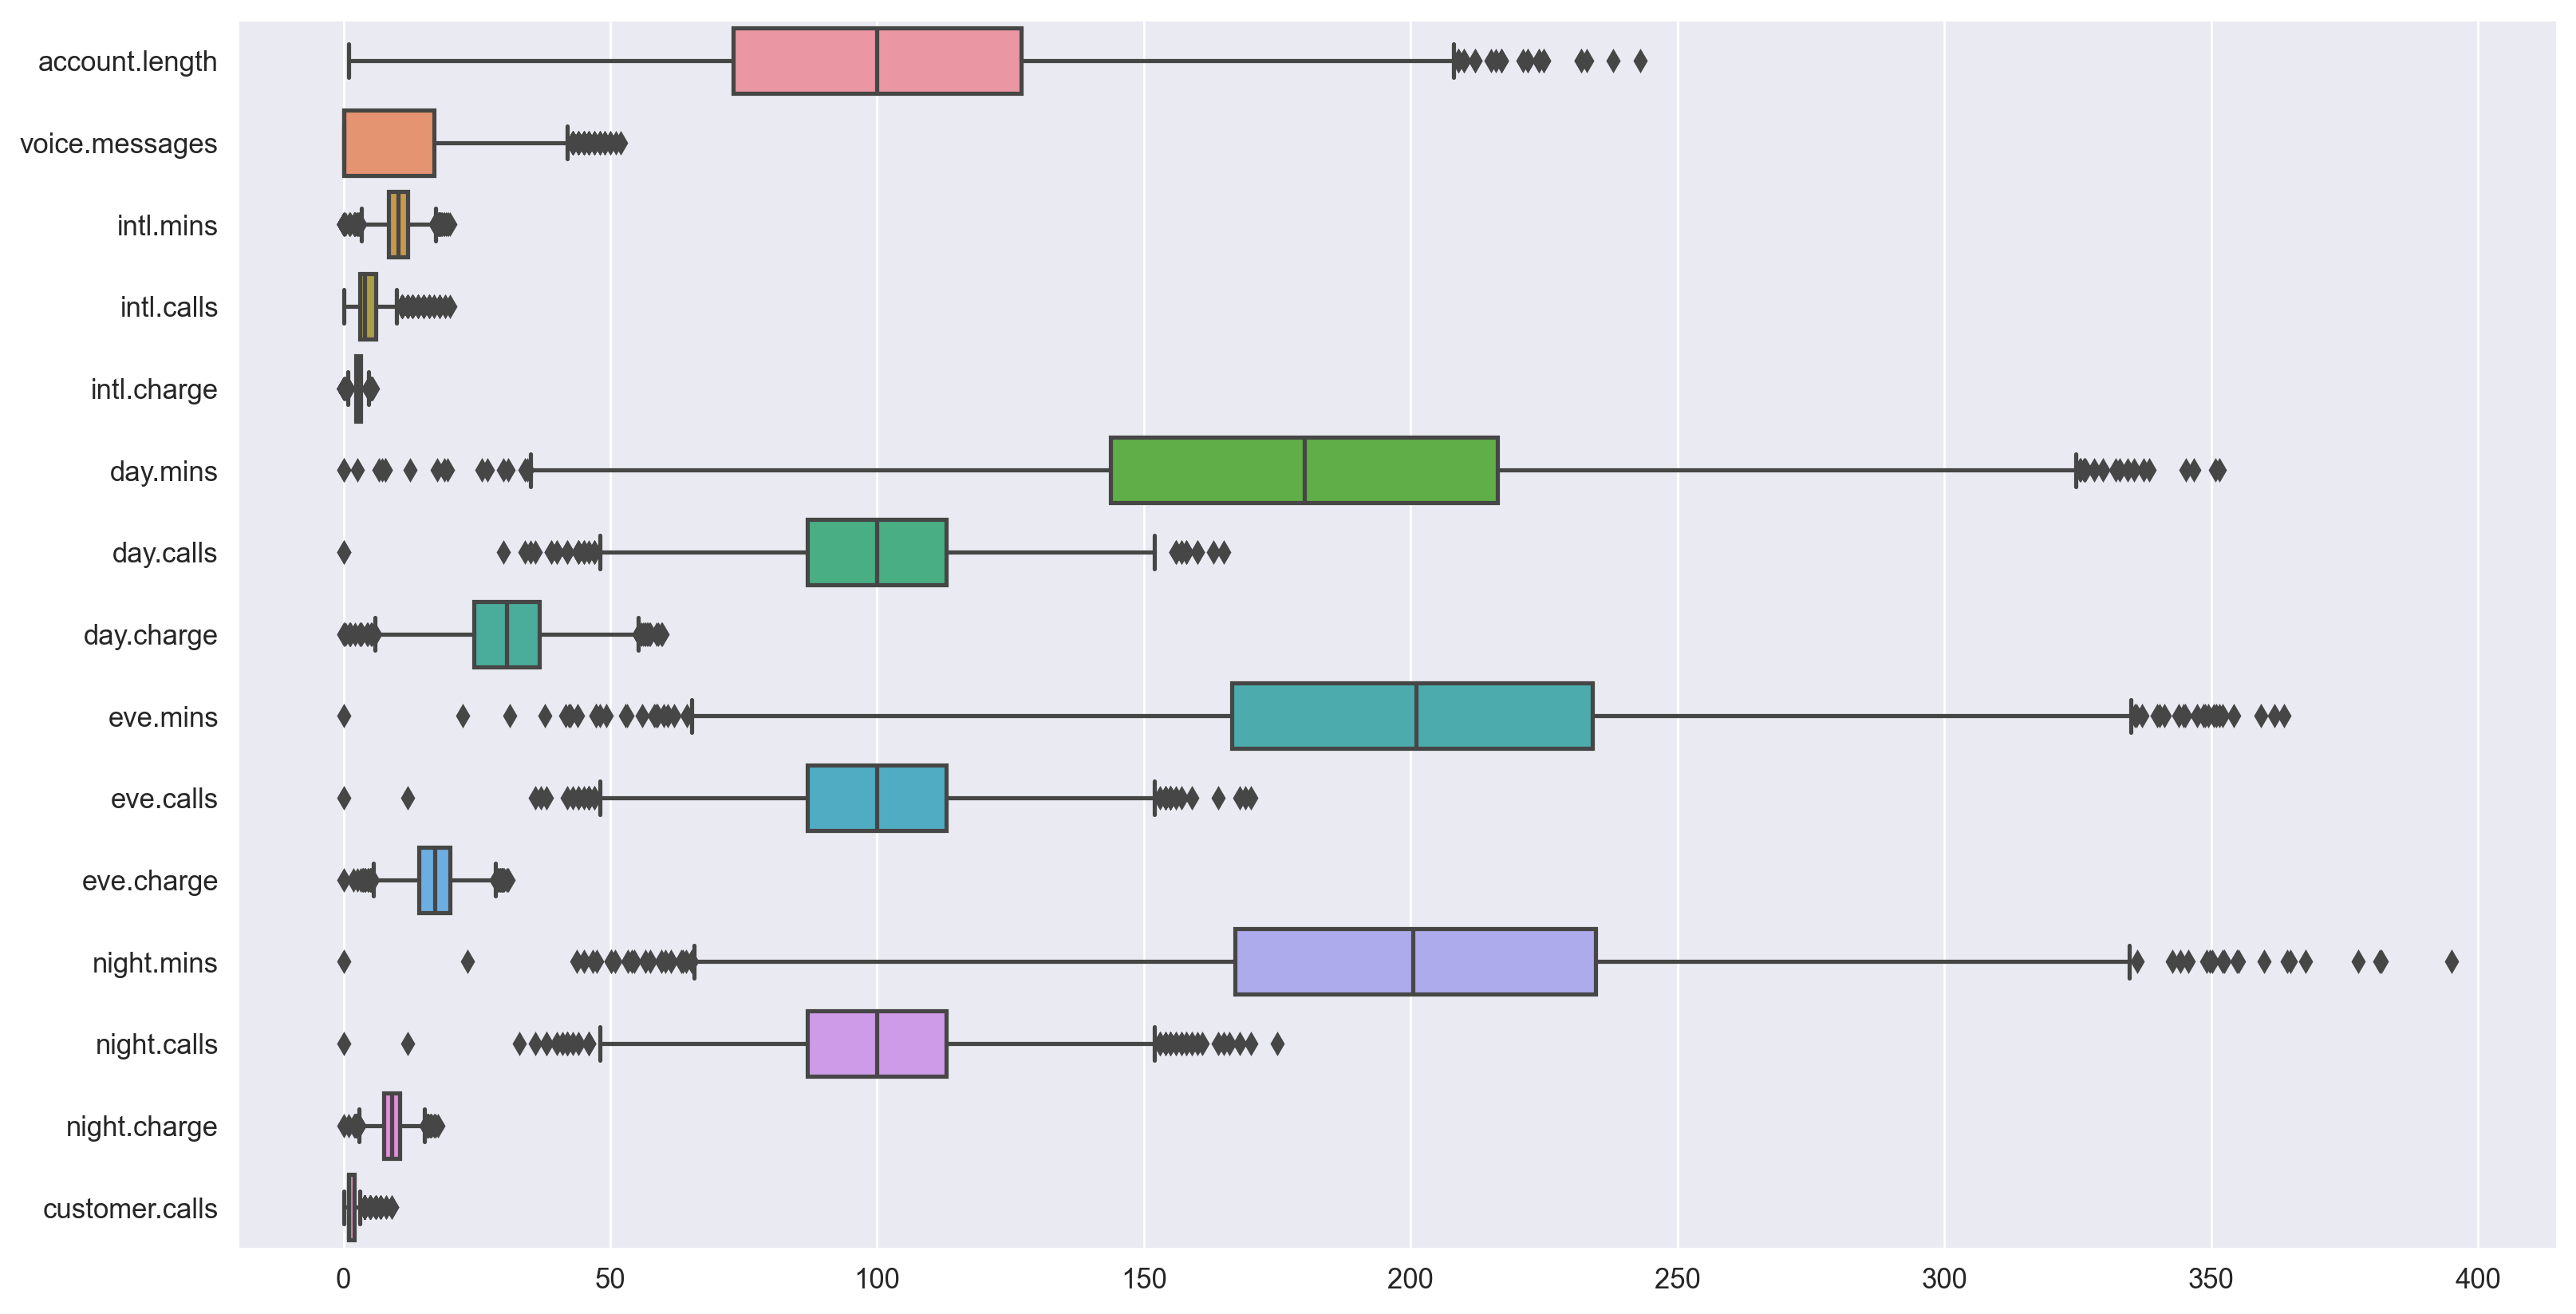

In [30]:
sns.boxplot(data=ch, orient='h')

In [46]:
ch.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

#### Ploting International Data

In [55]:
intl = ch.iloc[:,5:9]
intl['churn'] = ch['churn']

intl.head()

,intl.plan,intl.mins,intl.calls,intl.charge,churn
0,no,10.0,3,2.70,no
1,no,13.7,3,3.70,no
2,no,12.2,5,3.29,no
3,yes,6.6,7,1.78,no
4,yes,10.1,3,2.73,no


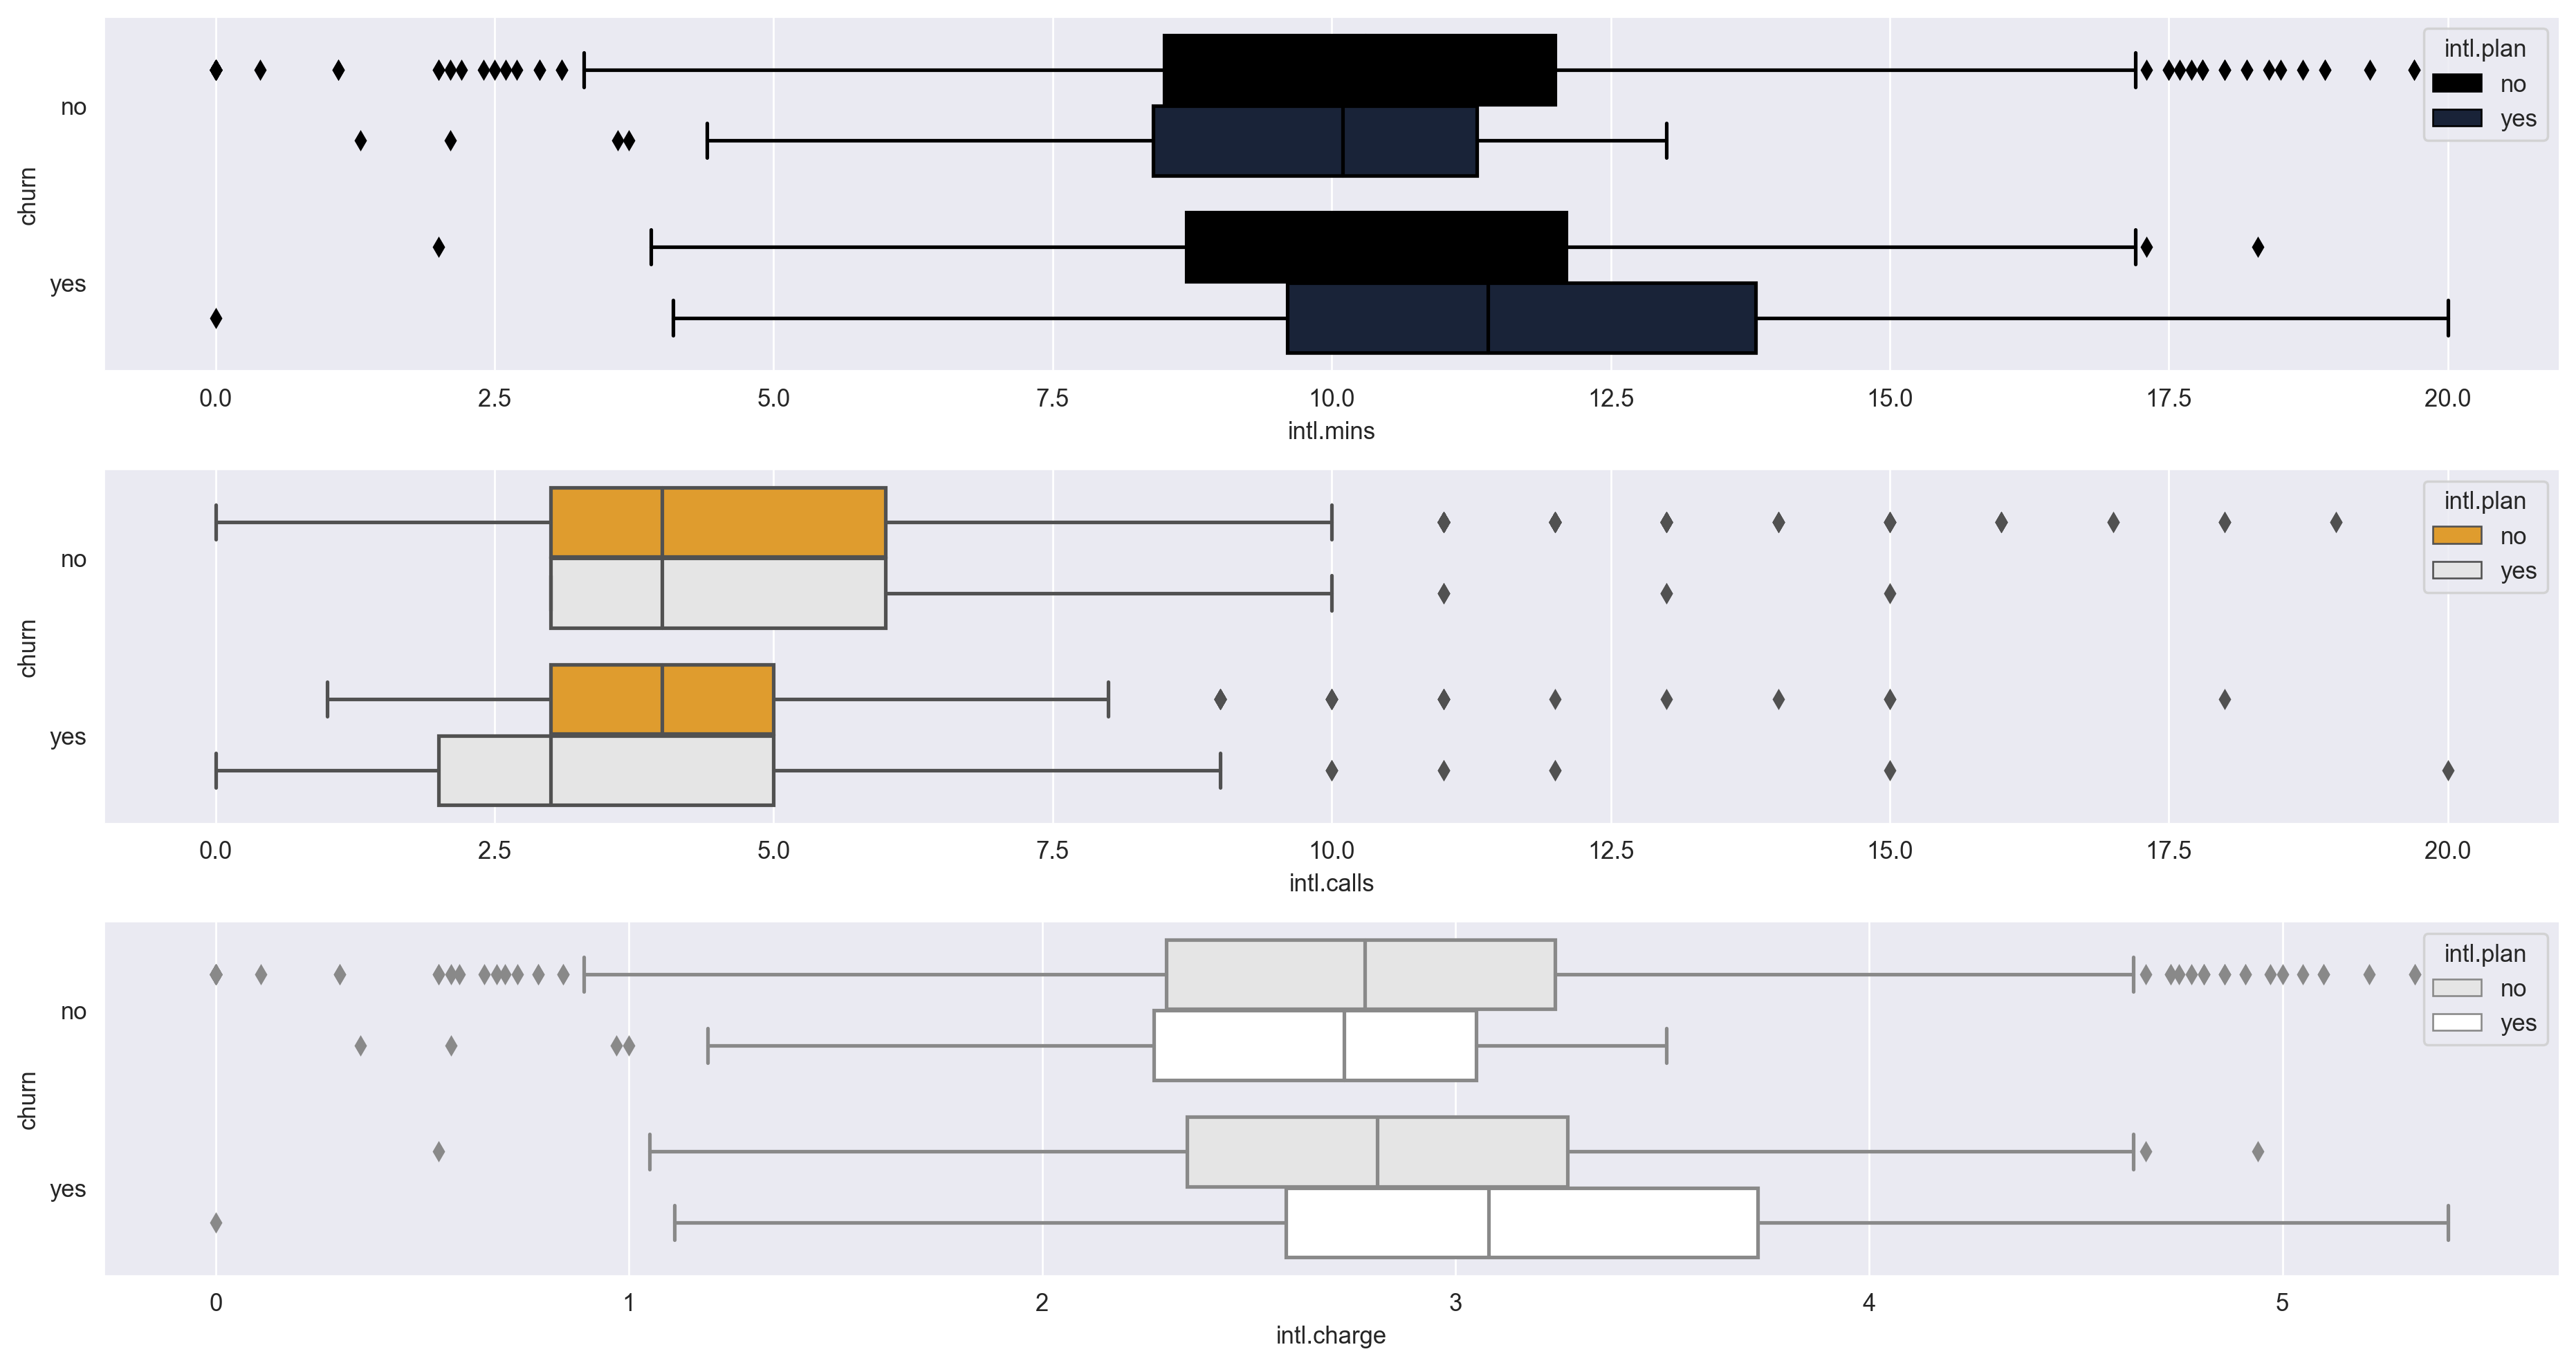

In [67]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='churn', x = 'intl.mins', data = intl, 
            hue = 'intl.plan', ax=ax[0],
            palette=['#000000', '#14213d'])

sns.boxplot(y ='churn', x = 'intl.calls', data = intl, 
            hue = 'intl.plan', ax=ax[1],
            palette=['#fca311', '#e5e5e5'])

sns.boxplot(y ='churn', x = 'intl.charge', data = intl, 
            hue = 'intl.plan', ax=ax[2],
            palette=['#e5e5e5', '#ffffff'])

plt.tight_layout()

#### Ploting Day Data

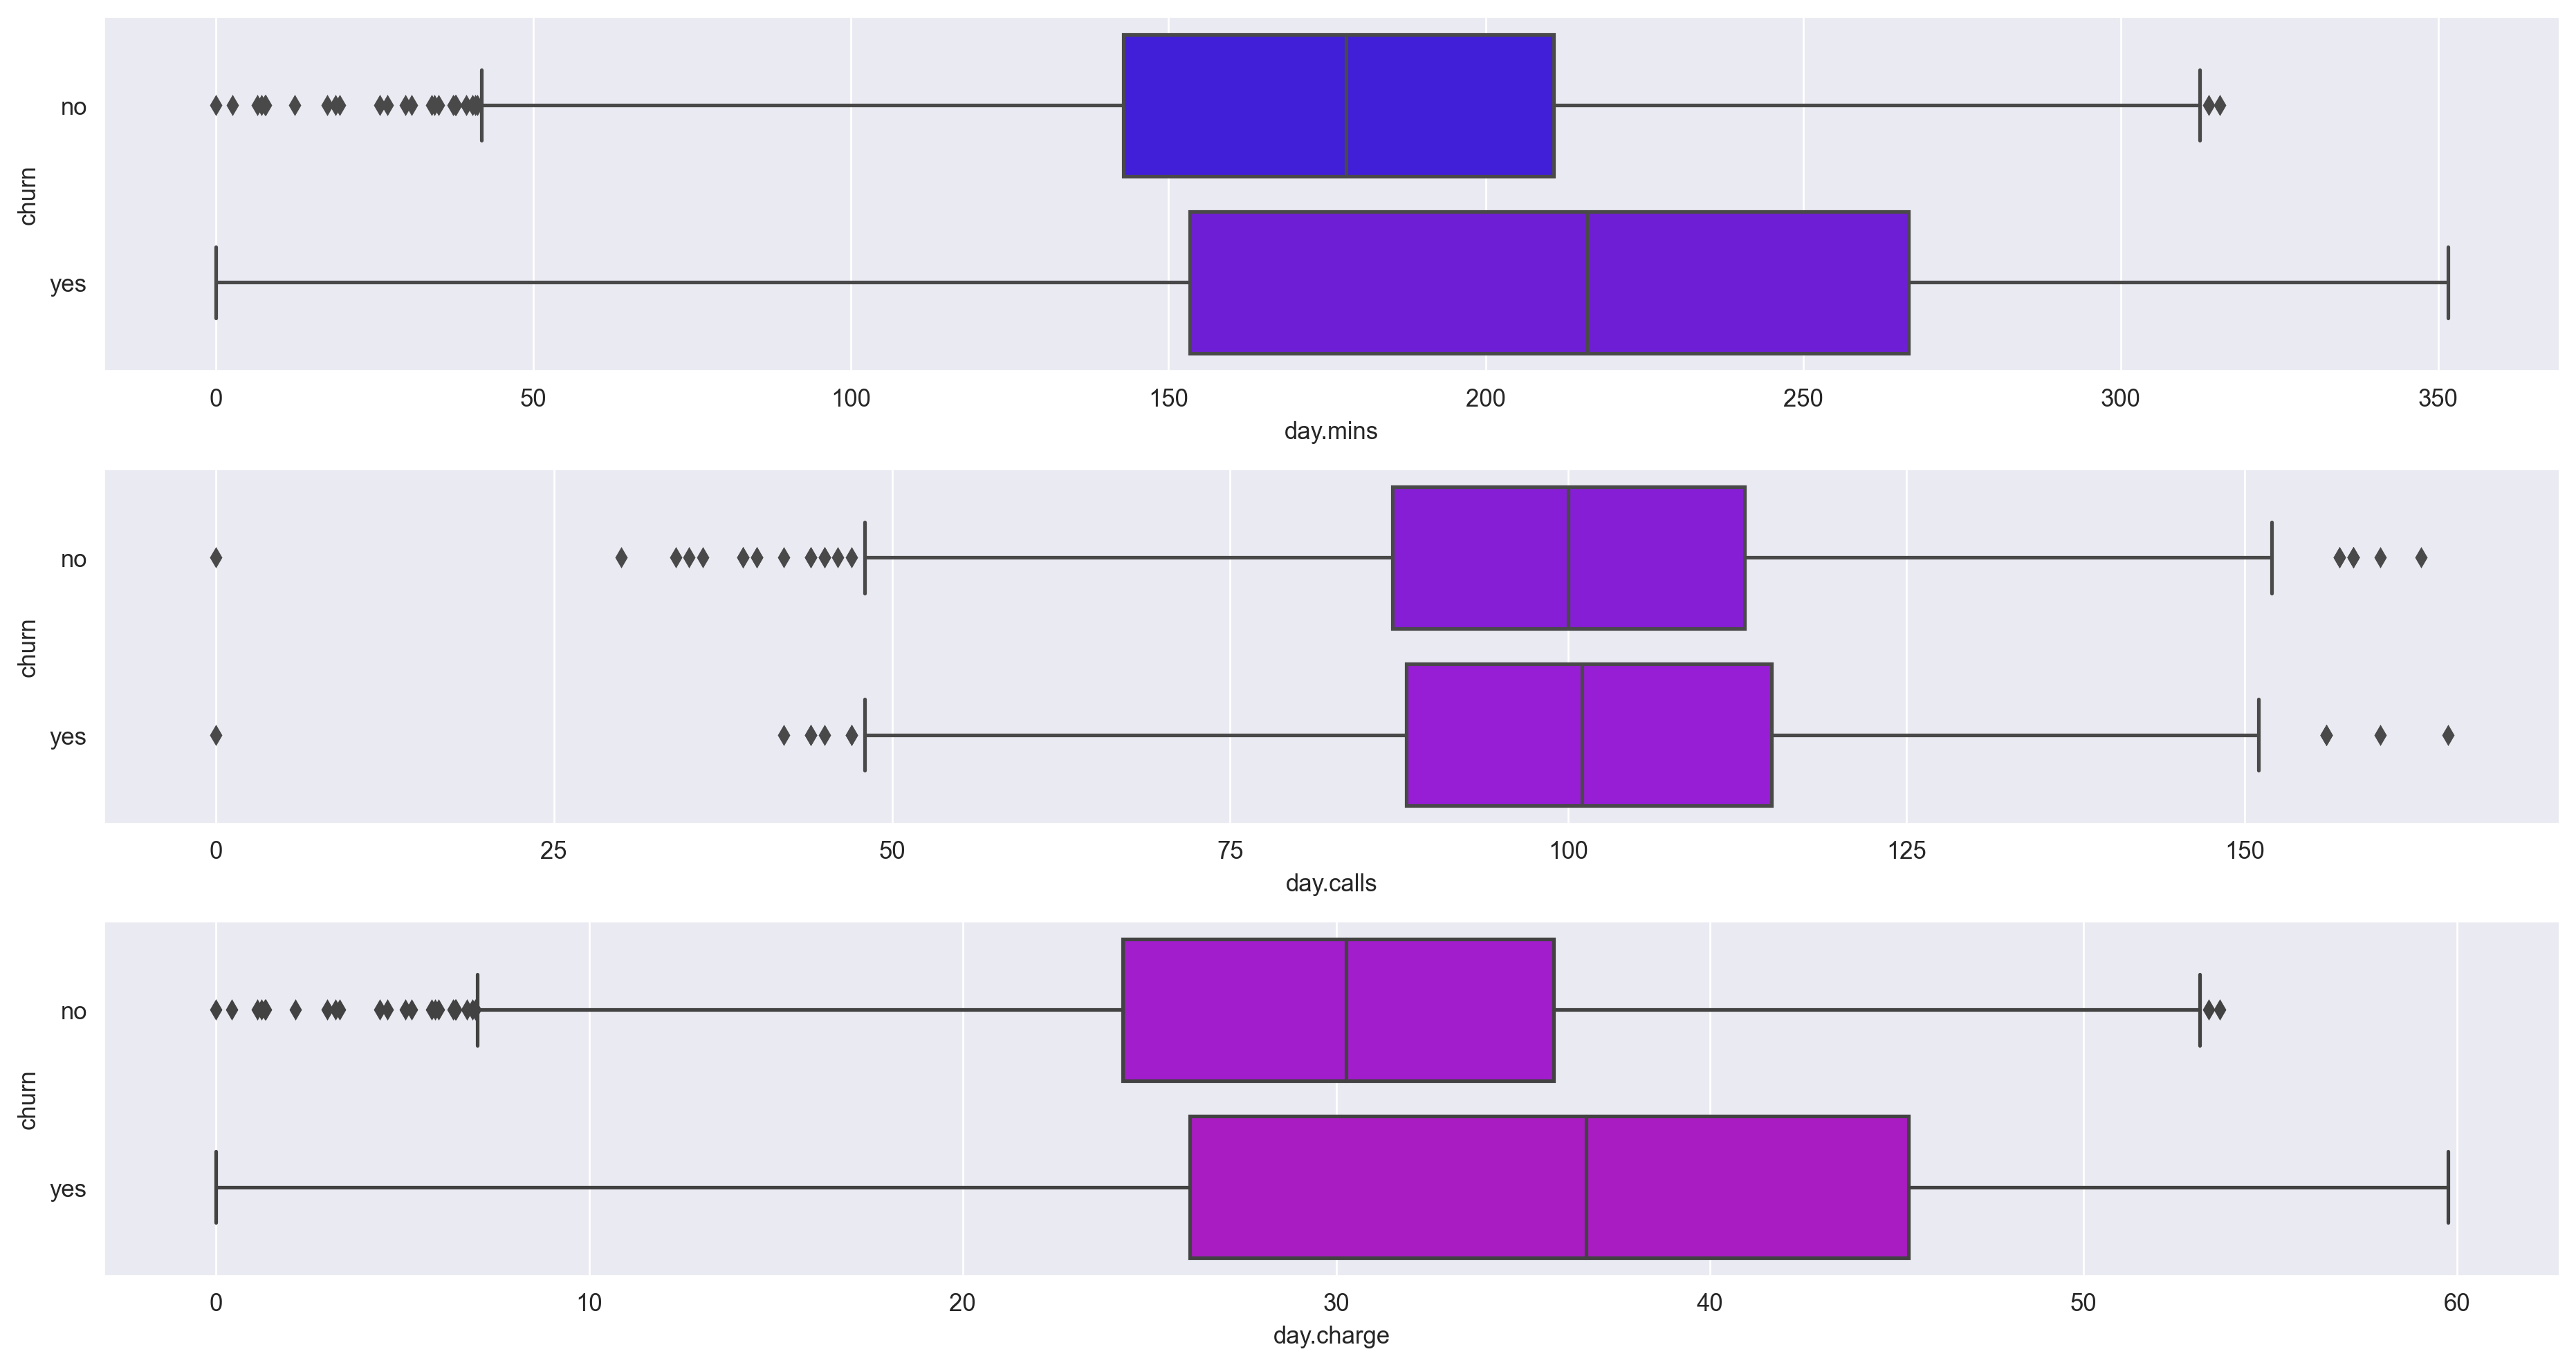

In [79]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='churn', x = 'day.mins', data = ch, 
            ax=ax[0], palette=['#2d00f7', '#6a00f4'])

sns.boxplot(y ='churn', x = 'day.calls', data = ch, 
            ax=ax[1], palette=['#8900f2', '#a100f2'])

sns.boxplot(y ='churn', x = 'day.charge', data = ch, 
            ax=ax[2], palette=['#b100e8', '#bc00dd'])

plt.tight_layout()

#### Ploting Evening Data

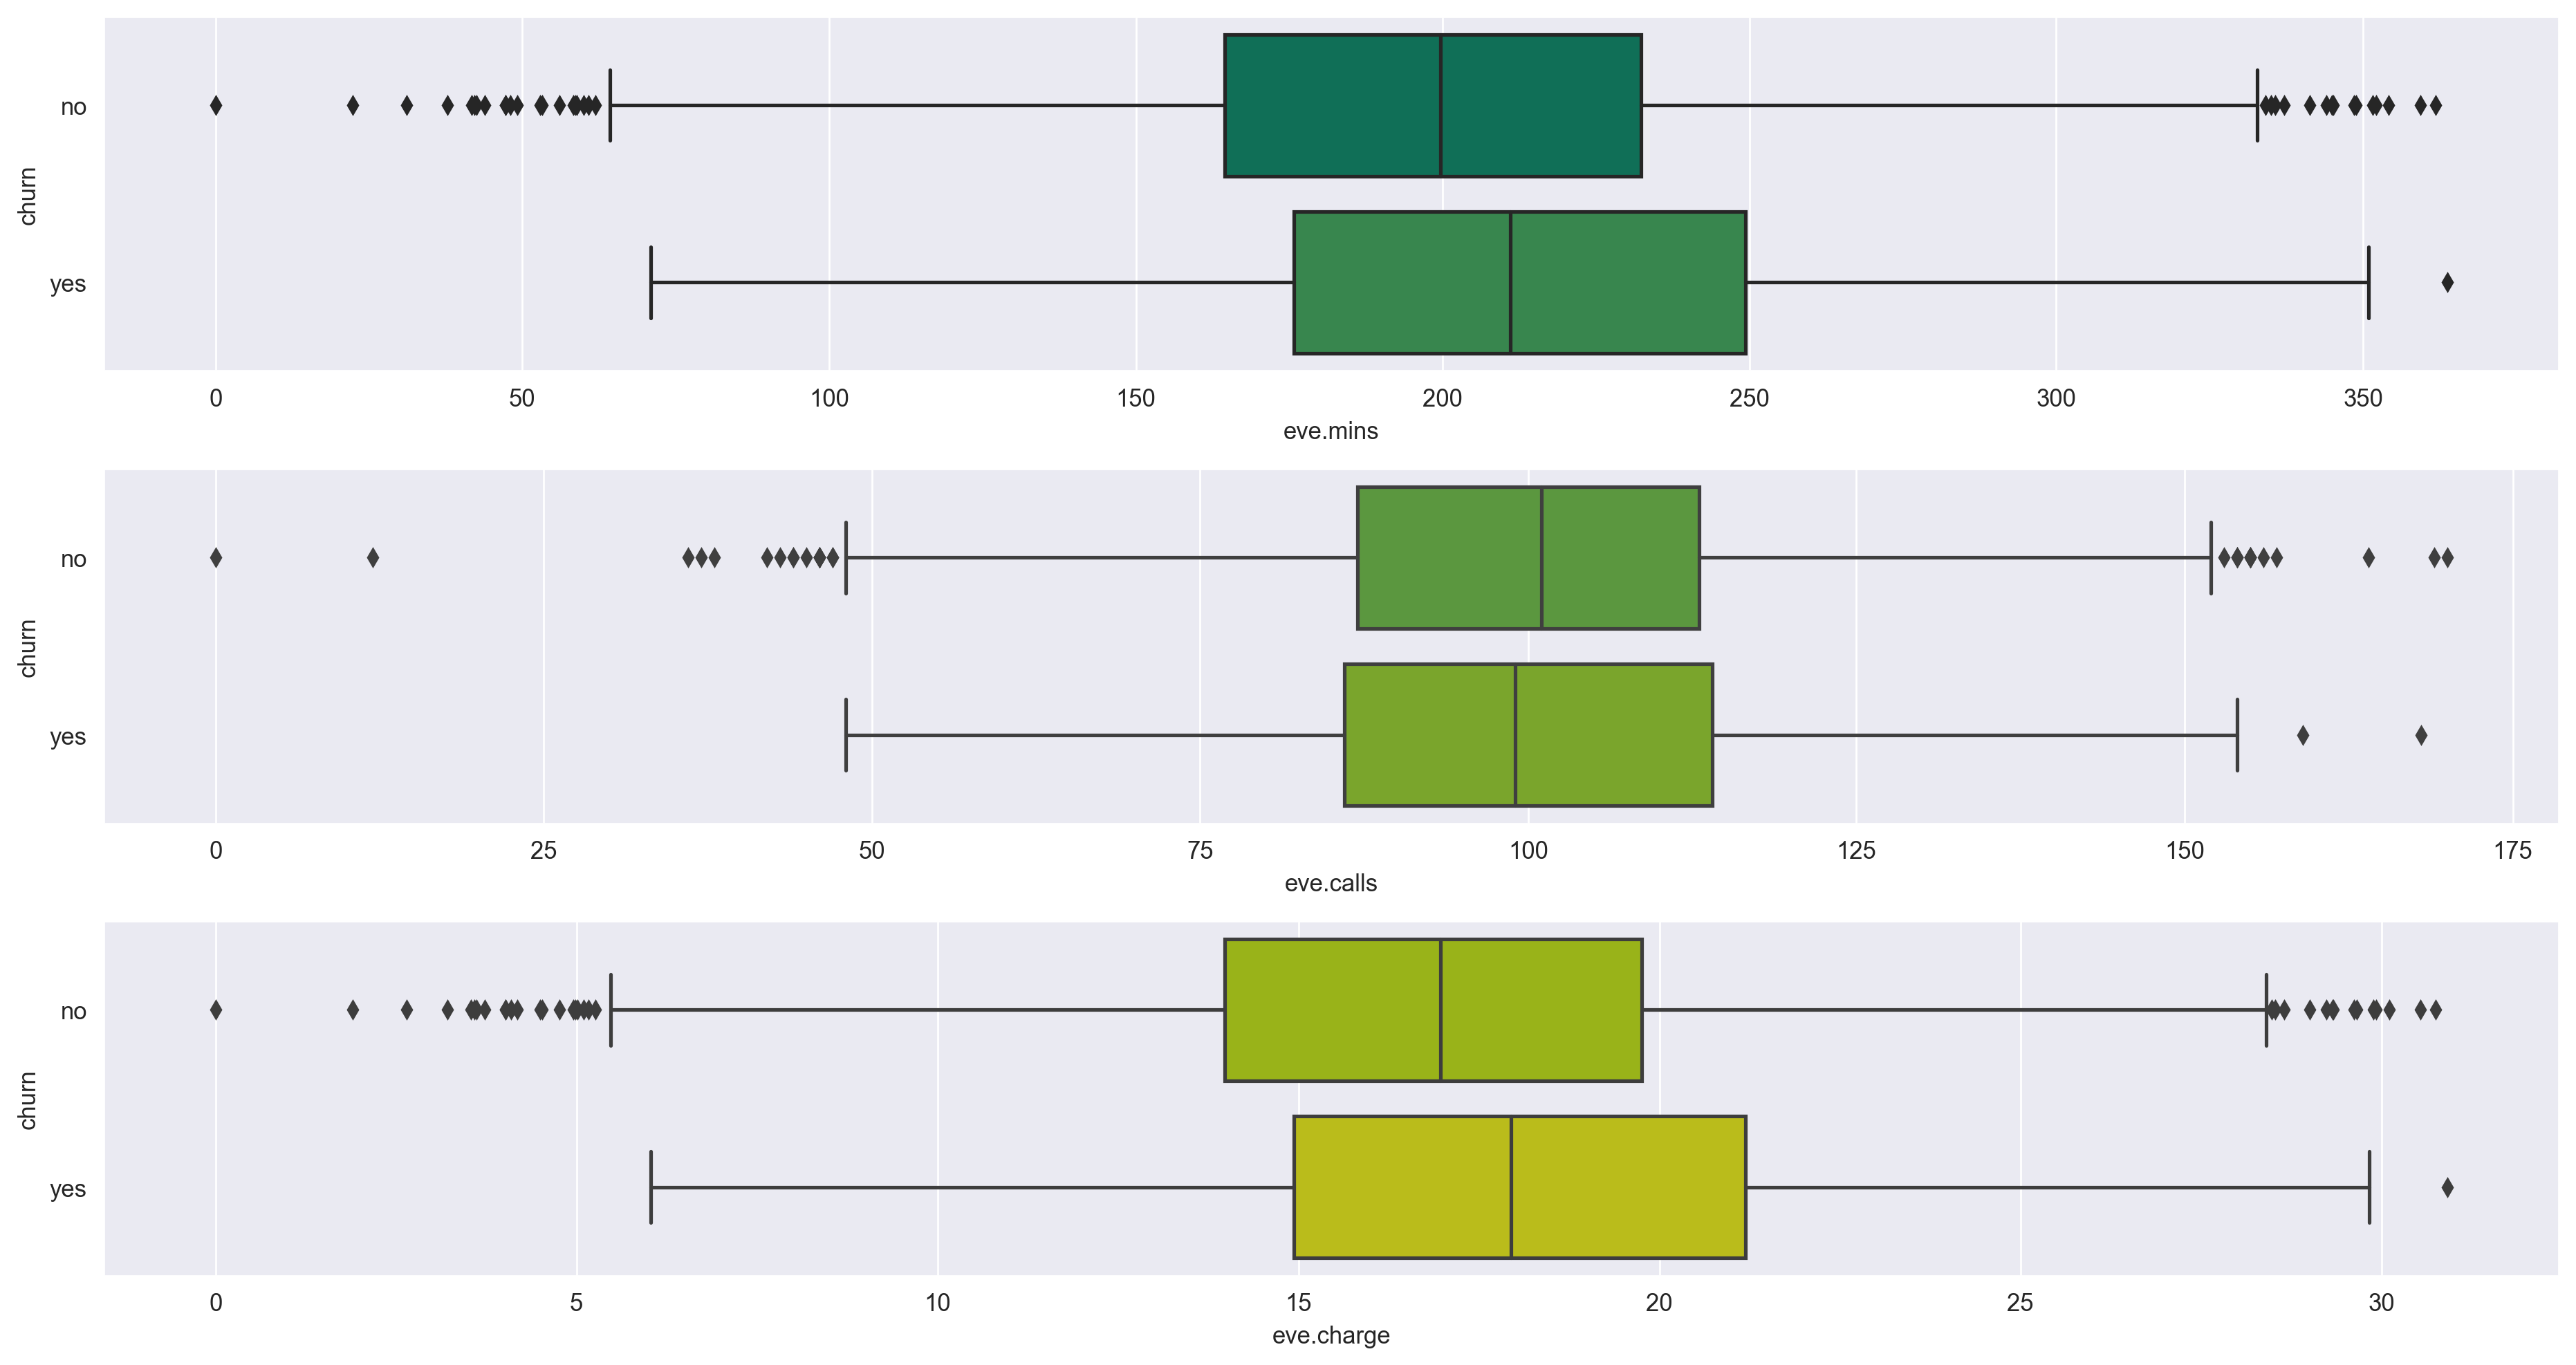

In [81]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='churn', x = 'eve.mins', data = ch, 
            ax=ax[0], palette=['#007f5f', '#2b9348'])

sns.boxplot(y ='churn', x = 'eve.calls', data = ch, 
            ax=ax[1], palette=['#55a630', '#80b918'])

sns.boxplot(y ='churn', x = 'eve.charge', data = ch, 
            ax=ax[2], palette=['#aacc00', '#d4d700'])

plt.tight_layout()

#### Ploting Night Data

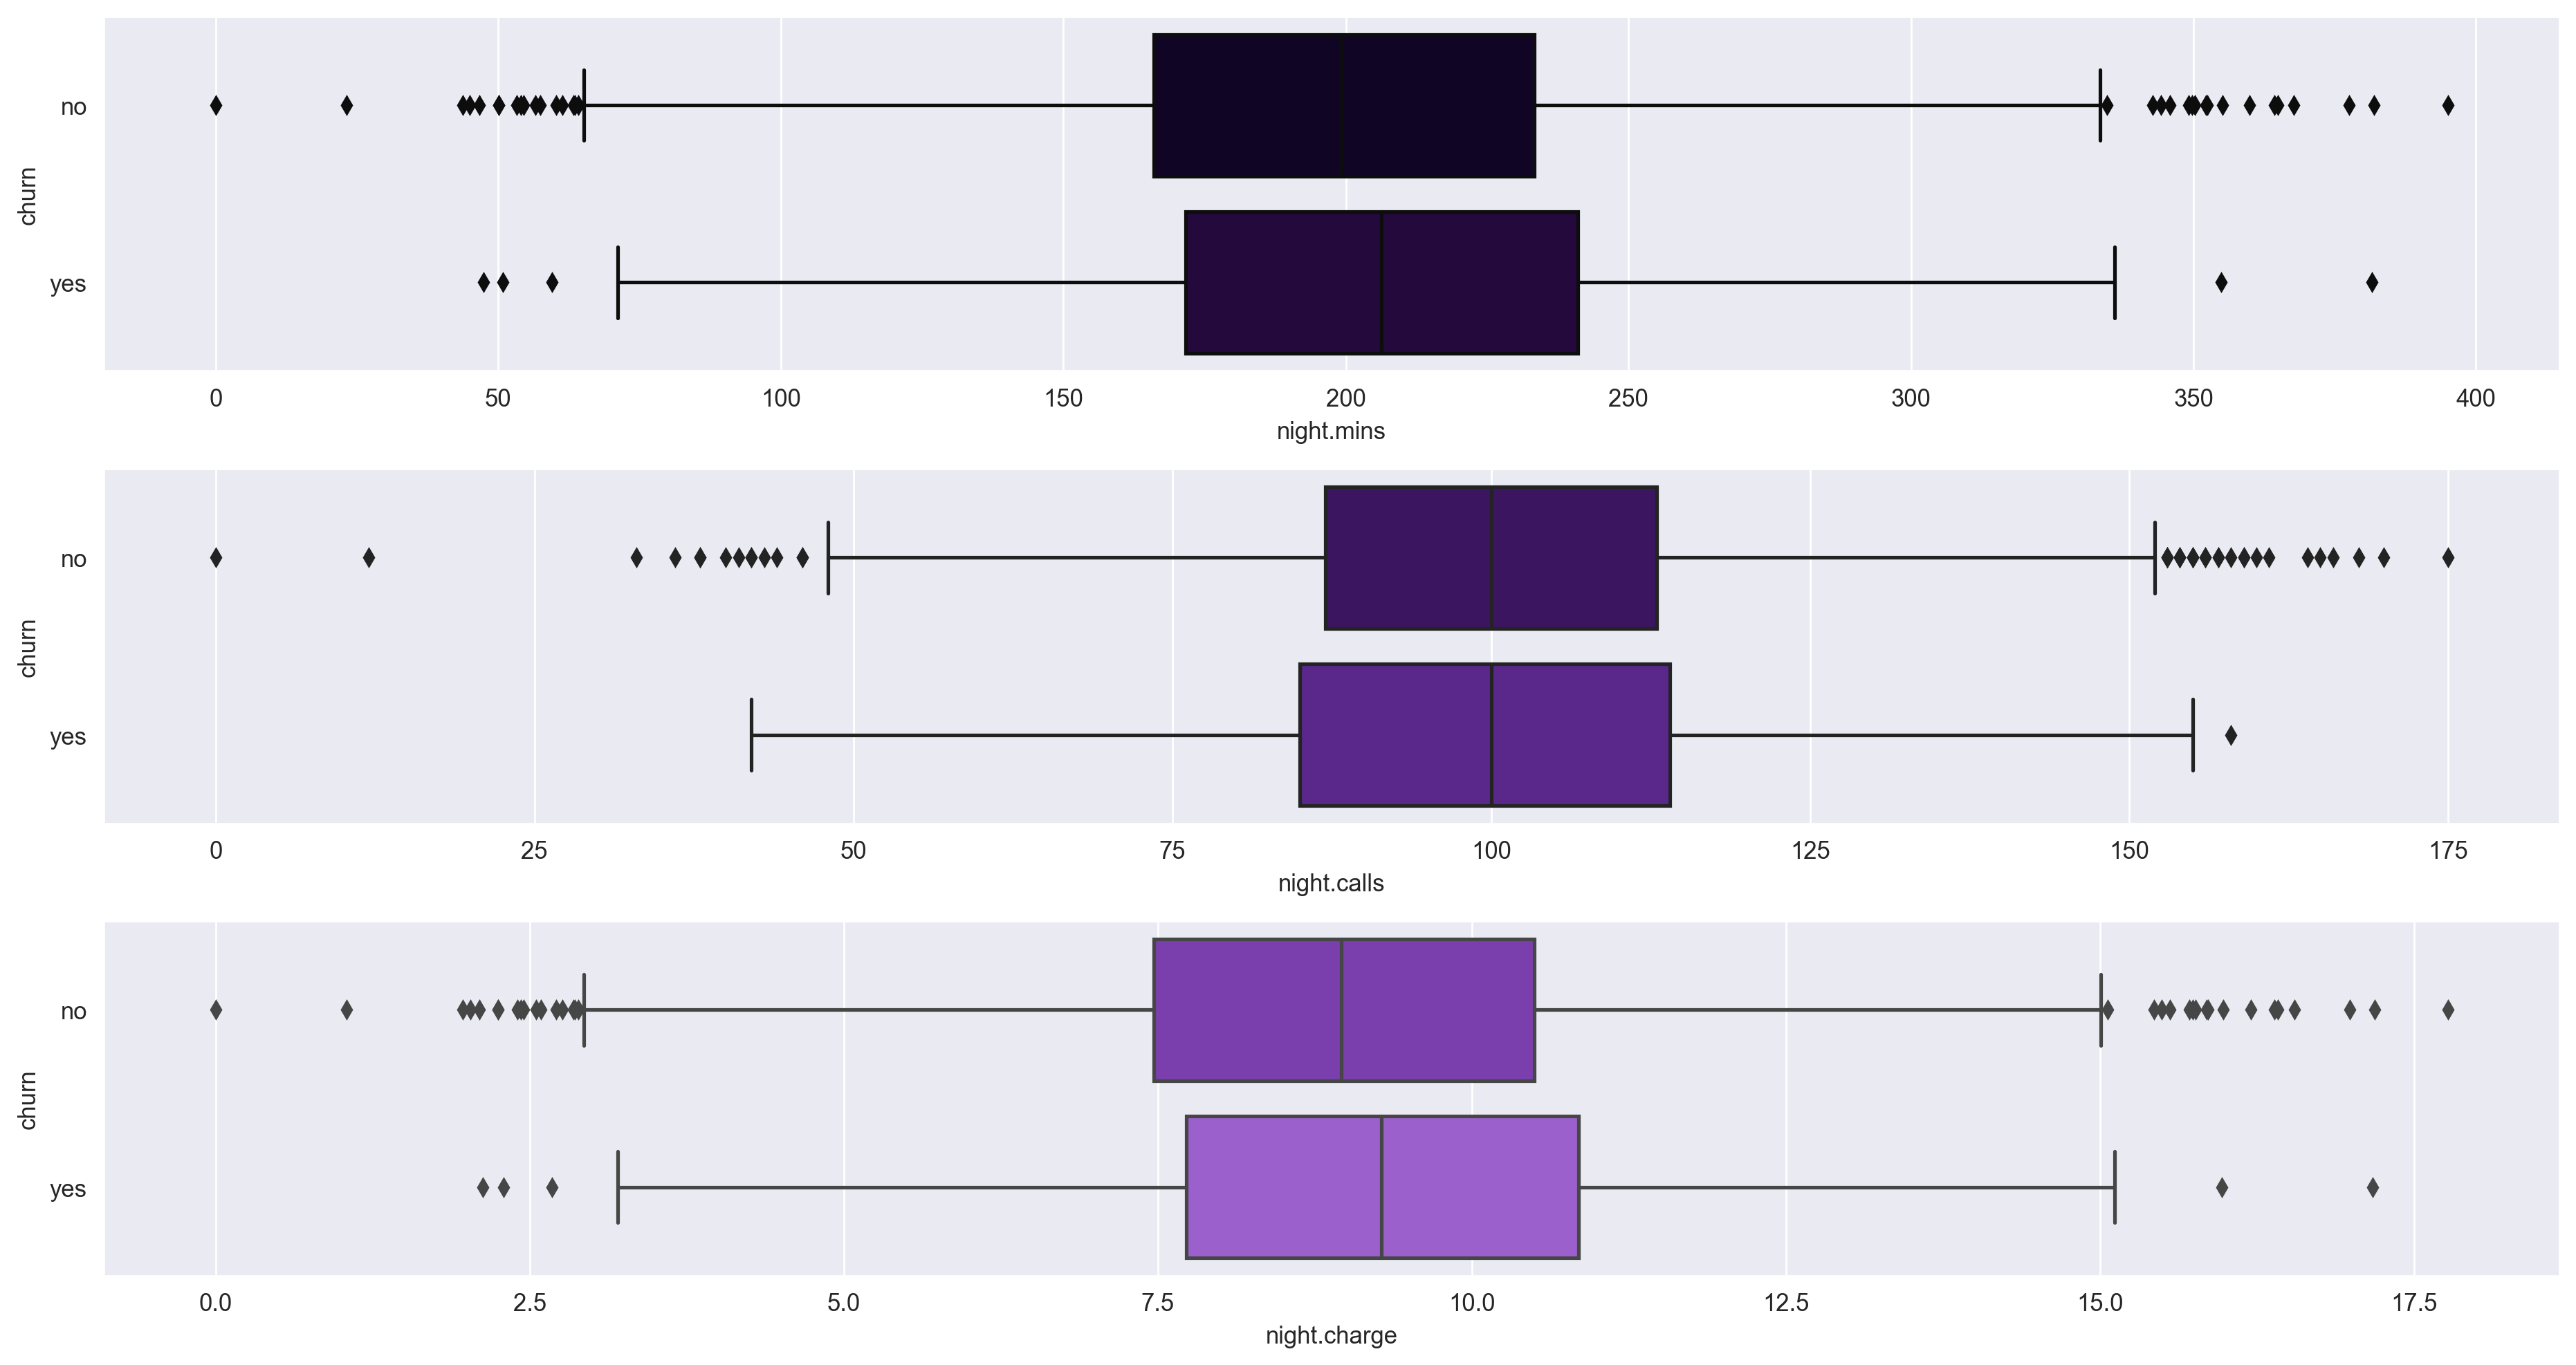

In [72]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='churn', x = 'night.mins', data = ch, 
            ax=ax[0], palette=['#10002b', '#240046'])

sns.boxplot(y ='churn', x = 'night.calls', data = ch, 
            ax=ax[1], palette=['#3c096c', '#5a189a'])

sns.boxplot(y ='churn', x = 'night.charge', data = ch, 
            ax=ax[2], palette=['#7b2cbf', '#9d4edd'])

plt.tight_layout()